In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu118



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
 pip install -U ultralytics

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model

Using cache found in C:\Users\Dell/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-5-26 Python-3.13.2 torch-2.7.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [18]:
img = 'https://ultralytics.com/images/zidane.jpg'

C:\Users\Dell/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 2751.8ms pre-process, 267.7ms inference, 1.9ms NMS per image at shape (1, 3, 384, 640)


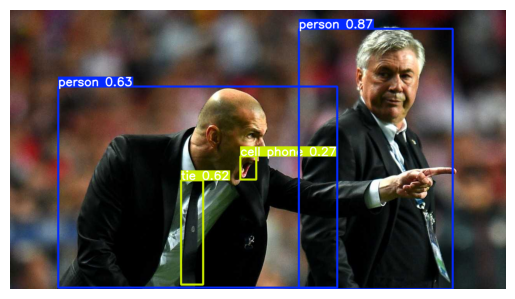

In [19]:
results = model(img)
results.print()

%matplotlib inline
rendered_img = results.render()[0]  # get the first image from the list
plt.imshow(rendered_img)
plt.axis('off')
plt.show()

Detect image by using yolov8n


0: 352x640 5 persons, 5 cars, 1 truck, 1 traffic light, 1 handbag, 96.9ms
Speed: 3.9ms preprocess, 96.9ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)


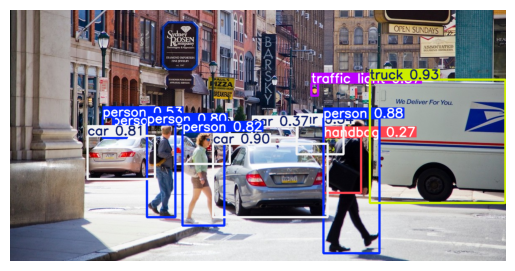

In [20]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. Model load karo (YOLOv8n as example)
model = YOLO('yolov8n.pt')  # ya apne pasand ka model path

# 2. Image path (apna image path yahan daalo)
image_path = r"C:\Users\Dell\Downloads\people.jpg" # Windows path mein r prefix ya forward slash use karo

# 3. Image read karo OpenCV se
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image path sahi nahi hai ya image load nahi hui")

# 4. YOLO model se detect karo
results = model(img)

# 5. Results render karo (image ke upar boxes etc.)
img_with_boxes = results[0].plot()

# 6. Image display karo matplotlib se (OpenCV me bhi kar sakte ho)
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



0: 448x640 36 cars, 2 trucks, 221.9ms
Speed: 9.6ms preprocess, 221.9ms inference, 8.6ms postprocess per image at shape (1, 3, 448, 640)


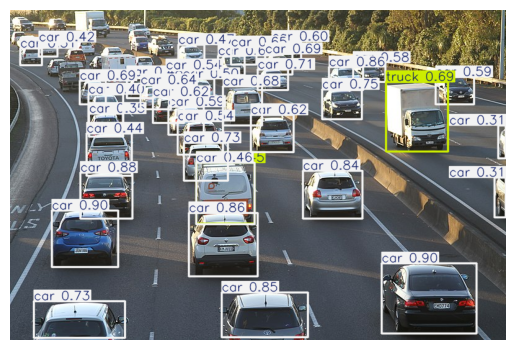

In [7]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. Model load karo (YOLOv8n as example)
model = YOLO('yolov8n.pt')  # ya apne pasand ka model path

# 2. Image path (apna image path yahan daalo)
image_path = r"C:\Users\Dell\Downloads\traffic.jpg"  # Windows path mein r prefix ya forward slash use karo

# 3. Image read karo OpenCV se
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image path sahi nahi hai ya image load nahi hui")

# 4. YOLO model se detect karo
results = model(img)

# 5. Results render karo (image ke upar boxes etc.)
img_with_boxes = results[0].plot()

# 6. Image display karo matplotlib se (OpenCV me bhi kar sakte ho)
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Real time object detection

In [21]:
pip install ultralytics opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")


In [4]:
from ultralytics import YOLO
import cv2
import numpy as np


In [24]:
model = YOLO("yolov8m.pt")  # or yolov8s.pt / yolov8l.pt


100%|██████████| 49.7M/49.7M [00:26<00:00, 1.94MB/s]


In [25]:
# Start capturing video from webcam
cap = cv2.VideoCapture(0)  # 0 for default camera

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection
    results = model(frame)

    # Render the result on the frame
    annotated_frame = results[0].plot()

    # Show the frame in a window
    cv2.imshow("YOLOv8 Real-Time Detection", annotated_frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()




0: 480x640 1 person, 644.4ms
Speed: 5.0ms preprocess, 644.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 828.9ms
Speed: 9.4ms preprocess, 828.9ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 800.6ms
Speed: 3.9ms preprocess, 800.6ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 spoon, 705.1ms
Speed: 3.8ms preprocess, 705.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 611.6ms
Speed: 4.8ms preprocess, 611.6ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 660.4ms
Speed: 5.4ms preprocess, 660.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 spoon, 641.2ms
Speed: 3.5ms preprocess, 641.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 685.9ms
Speed: 4.2ms preprocess, 685.9ms inference, 2.2ms postpr

video detection

In [5]:
model = YOLO("yolov8m.pt")  # or yolov8s.pt / yolov8l.pt


In [6]:
from ultralytics import YOLO
import cv2
import os


In [7]:
video_path =video_path = "C:/Users/Dell/Downloads/Road traffic video for object recognition.mp4"
output_path = "output_detected.mp4"


In [9]:
# Load the video
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or use 'XVID'
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection
    results = model(frame)

    # Draw results
    annotated_frame = results[0].plot()

    # Save frame to output video
    out.write(annotated_frame)

    # Display (optional)
    cv2.imshow("YOLOv8 Video Detection", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()



0: 384x640 14 cars, 1 bus, 1 truck, 396.2ms
Speed: 2.0ms preprocess, 396.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 386.8ms
Speed: 2.2ms preprocess, 386.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 cars, 1 bus, 1 truck, 397.9ms
Speed: 2.7ms preprocess, 397.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 cars, 1 truck, 382.1ms
Speed: 2.4ms preprocess, 382.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 cars, 1 truck, 460.1ms
Speed: 4.8ms preprocess, 460.1ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 cars, 1 bus, 1 truck, 499.4ms
Speed: 2.4ms preprocess, 499.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 1 bus, 1 truck, 521.4ms
Speed: 2.5ms preprocess, 521.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1